This is just a basic explainition om SVR (Support Vector Regression) which is a part of SVM (Support Vector Machine), which is mainly used for Classification but algorithm and the approach which is applied for SVM is also helpful in using it as a regression. 

The main feature how SVM works is by keeping a hyperplane and max margin.

Lets consider the below as a Classification Problem, the SVM will makes a hyperplane or the main line for the division, classification the area above the line and area below the line.

Now if that line is considered as a hyperplane and the max margin error we see made with the dotten line is the one which classifies the specific range in which it can be included or excluded.

If we apply the same for Regression purposes than hyperplane changes according to the points present in the same.

If i have a linear distribution of data it will be plotted with the according to the hyperplane folowed by the margin that it gives with the regressor.

And if i have a non-linear plane then hyperplane will change according to that and will have the classification of the data.

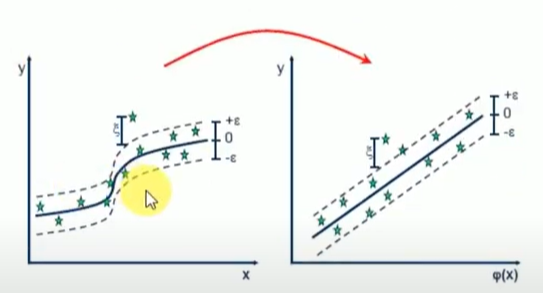


# Example 1 : Randomly generated data

In [1]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples, n_features = 10, 1
rng = np.random.RandomState(0)

y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [3]:
X, y

(array([[ 0.14404357],
        [ 1.45427351],
        [ 0.76103773],
        [ 0.12167502],
        [ 0.44386323],
        [ 0.33367433],
        [ 1.49407907],
        [-0.20515826],
        [ 0.3130677 ],
        [-0.85409574]]),
 array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ]))

In [4]:
X.shape, y.shape

((10, 1), (10,))

In [5]:
y = y.reshape(len(y), 1)
# y = y.reshape(-1, 1)

X.shape, y.shape

((10, 1), (10, 1))

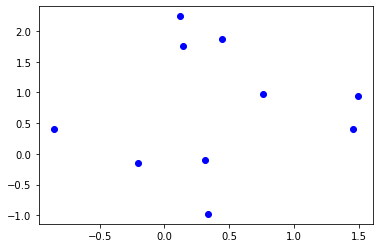

In [6]:
plt.scatter(X, y, color = 'blue')
plt.show()

In [7]:
reg_rbf = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) # Default kernel='rbf'
reg_lr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel = 'linear'))
reg_p = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel = 'poly'))


In [8]:
reg_rbf.fit(X, y)
reg_lr.fit(X, y)
reg_p.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='poly'))])

In [9]:
# Pipeline(steps=[('standardscaler', StandardScaler()),('svr', SVR(epsilon=0.2))])
# Pipeline(steps=[('standardscaler', StandardScaler()),('svr', SVR(epsilon=0.2))])
# Pipeline(steps=[('standardscaler', StandardScaler()),('svr', SVR(epsilon=0.2))])

In [10]:
y_pred_rbf = reg_rbf.predict([[1.49407907]])
y_pred_lr = reg_lr.predict([[1.49407907]])
y_pred_p = reg_p.predict([[1.49407907]])

y_pred_rbf, y_pred_lr, y_pred_p

(array([0.69748058]), array([0.7500884]), array([0.75008945]))

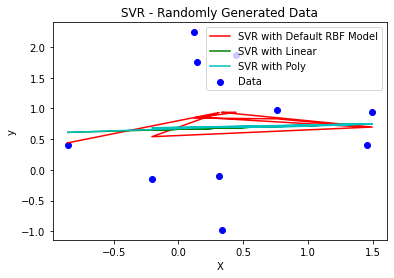

In [11]:
plt.scatter(X, y, color = 'blue', label = 'Data')

plt.plot(X, reg_rbf.predict(X), color = 'r', label = 'SVR with Default RBF Model')
plt.plot(X, reg_lr.predict(X), color = 'g', label = 'SVR with Linear')
plt.plot(X, reg_p.predict(X), color = 'c', label = 'SVR with Poly')

plt.title("SVR - Randomly Generated Data")

plt.xlabel('X')
plt.ylabel('y')

plt.legend()

plt.show()  

In [12]:
# Change in C and gamma
reg_rbf = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.1, gamma=0.1)) # Default kernel='rbf'
reg_lr = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.1, kernel = 'linear', gamma='auto'))
reg_p = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.1, kernel = 'poly', gamma='auto', degree=3, coef0=1))

reg_rbf.fit(X, y)
reg_lr.fit(X, y)
reg_p.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, coef0=1, gamma='auto', kernel='poly'))])

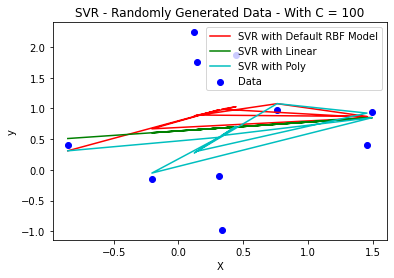

In [13]:
plt.scatter(X, y, color = 'blue', label = 'Data')

plt.plot(X, reg_rbf.predict(X), color = 'r', label = 'SVR with Default RBF Model')
plt.plot(X, reg_lr.predict(X), color = 'g', label = 'SVR with Linear')
plt.plot(X, reg_p.predict(X), color = 'c', label = 'SVR with Poly')

plt.title("SVR - Randomly Generated Data - With C = 100")

plt.xlabel('X')
plt.ylabel('y')

plt.legend()

plt.show()

# Example 2 : Simulate the actual data
To see the example, lets have our own simple data.

For this I am createing a sample data of positions in companies, and their level, based on that the Salary is derived.

Now our aim is to predict the salary for a person who joined with a level of 8.5.

In [14]:
data = {'Position':['CEO','Sr. Director','Director','Region Manager','Country Manager','Manager','Consultant','Software Engineer','Business ANalyst','Junior Engineer',], 
        'Level': [10,9,8,7,6,5,4,3,1,2],
        'Salary' : [700,500,300,200,150,110,80,50,60,45] # in Thousands
       } 

In [15]:
## Import Library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [16]:
# Creating DataFrame   
df = pd.DataFrame(data)

In [17]:
df

,Position,Level,Salary
0,CEO,10,700
1,Sr. Director,9,500
2,Director,8,300
3,Region Manager,7,200
4,Country Manager,6,150
5,Manager,5,110
6,Consultant,4,80
7,Software Engineer,3,50
8,Business ANalyst,1,60
9,Junior Engineer,2,45


## Defining Feature and Target

In [18]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# X = df.drop(['Position','Salary'], axis=1)
# y = df.Salary

In [19]:
X

array([[10],
       [ 9],
       [ 8],
       [ 7],
       [ 6],
       [ 5],
       [ 4],
       [ 3],
       [ 1],
       [ 2]])

In [20]:
y

array([700, 500, 300, 200, 150, 110,  80,  50,  60,  45])

In [21]:
y.shape

(10,)

In [22]:
# y = y.reshape(len(y), 1)
# y.shape

In [23]:
y

array([700, 500, 300, 200, 150, 110,  80,  50,  60,  45])

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

xsc = StandardScaler()
ysc = StandardScaler()

X_scaled = xsc.fit_transform(X)
y_scaled = ysc.fit_transform(y.reshape(-1,1))
# y_scaled = ysc.fit_transform(y)

In [25]:
y_scaled.shape

(10, 1)

In [26]:
y_scaled

array([[ 2.29769554],
       [ 1.34131862],
       [ 0.38494171],
       [-0.09324675],
       [-0.33234098],
       [-0.52361636],
       [-0.6670729 ],
       [-0.81052944],
       [-0.76271059],
       [-0.83443886]])

## Model Training

## SVR

In [27]:
from sklearn.svm import SVR

reg = SVR(kernel = 'rbf')

reg.fit(X_scaled, y_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [28]:
y_pred = reg.predict([[8.5]])

y_pred = ysc.inverse_transform(y_pred)
y_pred

array([237.60927603])

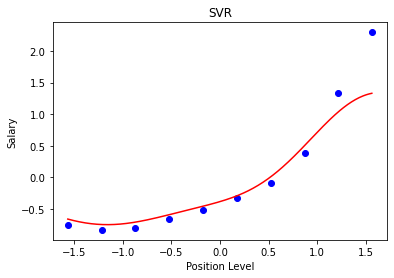

In [29]:
x_grid = np.arange(min(X_scaled), max(X_scaled), 0.01) # choice of 0.01 instead of 0.1 is as the data is featured scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'blue')
plt.plot(x_grid, reg.predict(x_grid), color = 'red') 
plt.title("SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Lets change the Kernel Value from `rbf` to `linear`

In [30]:
reg_l = SVR(kernel = 'linear')

reg_l.fit(X_scaled, y_scaled)

y_pred = reg_l.predict([[8.5]])

y_pred = ysc.inverse_transform(y_pred)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1210.44939764])

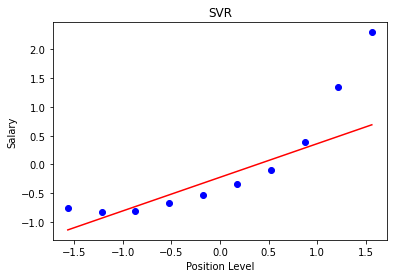

In [31]:
x_grid = np.arange(min(X_scaled), max(X_scaled), 0.01) # choice of 0.01 instead of 0.1 is as the data is featured scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'blue')
plt.plot(x_grid, reg_l.predict(x_grid), color = 'red')
plt.title("SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

So with the Linear it not results the expectation.

In [32]:
reg_p = SVR(kernel = 'poly')

reg_p.fit(X_scaled, y_scaled)

y_pred = reg_p.predict([[8.5]])

y_pred = ysc.inverse_transform(y_pred)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([77295.65879883])

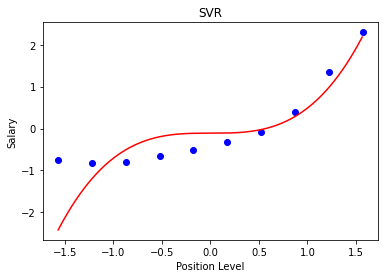

In [33]:
x_grid = np.arange(min(X_scaled), max(X_scaled), 0.01) # choice of 0.01 instead of 0.1 is as the data is featured scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'blue')
plt.plot(x_grid, reg_p.predict(x_grid), color = 'red')
plt.title("SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()  

So selecting the appropriate kernel is very important. 

## Linear Regression for Comparasion

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled, y_scaled)

#predecting the test set results
y_pred = lr.predict([[8.5]])
y_pred = ysc.inverse_transform(y_pred)
y_pred

array([[1787.19985012]])

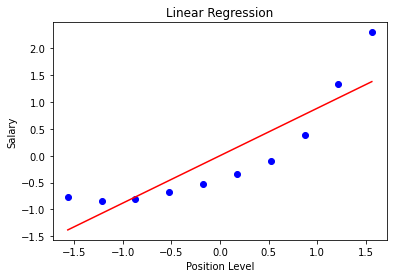

In [35]:
x_grid = np.arange(min(X_scaled), max(X_scaled), 0.01) # choice of 0.01 instead of 0.1 is as the data is featured scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'blue')
plt.plot(x_grid, lr.predict(x_grid), color = 'red')
plt.title("Linear Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()  

Plot all the Models

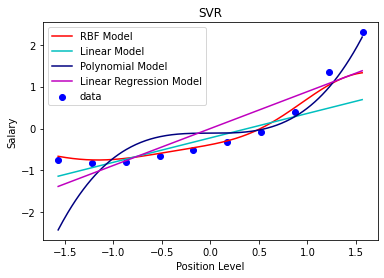

In [36]:
x_grid = np.arange(min(X_scaled), max(X_scaled), 0.01) # choice of 0.01 instead of 0.1 is as the data is featured scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'blue', label = 'data')
plt.plot(x_grid, reg.predict(x_grid), color = 'red', label = 'RBF Model')
plt.plot(x_grid, reg_l.predict(x_grid), color = 'c', label = 'Linear Model')
plt.plot(x_grid, reg_p.predict(x_grid), color = 'navy', label = 'Polynomial Model')
plt.plot(x_grid, lr.predict(x_grid), color = 'm', label = 'Linear Regression Model')
plt.title("SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()  

## Working with Epislon

In [37]:
eps = 20

reg_eps = SVR(kernel = 'rbf', epsilon=eps)

reg_eps.fit(X_scaled, y_scaled)

y_pred = reg_eps.predict([[8.5]])

y_pred = ysc.inverse_transform(y_pred)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([372.5])

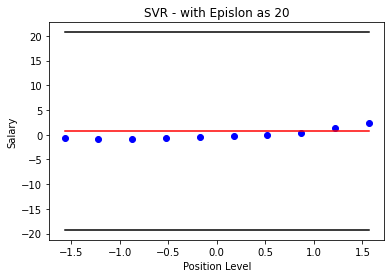

In [38]:
x_grid = np.arange(min(X_scaled), max(X_scaled), 0.01) # choice of 0.01 instead of 0.1 is as the data is featured scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'blue')
plt.plot(x_grid, reg_eps.predict(x_grid), color = 'red')
plt.plot(x_grid, reg_eps.predict(x_grid)-eps, color='black') # Vector
plt.plot(x_grid, reg_eps.predict(x_grid)+eps, color='black') # Vector
plt.title("SVR - with Epislon as {}".format(eps))
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()